In [10]:
import openpyxl as xl

wb = xl.load_workbook('FSR_trail1.xlsx')
sheet = wb['Sheet1']

cell1 = sheet['B48']            # 'ColumnRow'       #method1
cell2 = sheet.cell(48, 3)       # (Row, Column)     #method2

print(cell1.value, '\t\t' , cell2.value)

print(sheet.max_row, sheet.max_column)

Actual weight 		 FSR readings
59 22


In [18]:
sheet2 = wb['Sheet2']

for row in range(1, sheet2.max_row + 1) :
    actualW = sheet2.cell(row, 1)
    fsr = sheet2.cell(row, 2)

    print(actualW.value, '\t\t' , fsr.value)




Actual weight 		 FSR readings
6.04 		 65
22.26 		 144
27.31 		 179
42.09 		 216
51.74 		 267
62.77 		 276
72.72 		 292
82.01 		 295
89.35 		 301
103.38 		 305
117.77 		 309


In [75]:
import openpyxl as xl
from math import exp

wb = xl.load_workbook('FSR_trail1.xlsx')
sheet2 = wb['Sheet2']

readings = sheet2.max_row - 1

a = 95.43   #inverse
b = 112.02    #direct             ##IMP##  a(logc(W)) - b = fsr
c = 2.85

# FSR = 95.43 * log_2.85(x) + -112.02
# fsr = 91.051ln(x) - 112.02

for row in range(2, sheet2.max_row + 1) :
    actualW = sheet2.cell(row, 1)
    fsr = sheet2.cell(row, 2)

    # newW = exp((fsr.value + b) / a)
    newW = pow(c, (fsr.value + b) / a)

    print(actualW.value, '\t\t' , newW)


6.04 		 6.97789748400463
22.26 		 16.605795216257395
27.31 		 24.38254435606798
42.09 		 36.59577106000377
51.74 		 64.04872947448376
62.77 		 70.69796647902906
72.72 		 84.26887463250124
82.01 		 87.08953970683736
89.35 		 93.01727173788085
103.38 		 97.19158512341448
117.77 		 101.55322815122949


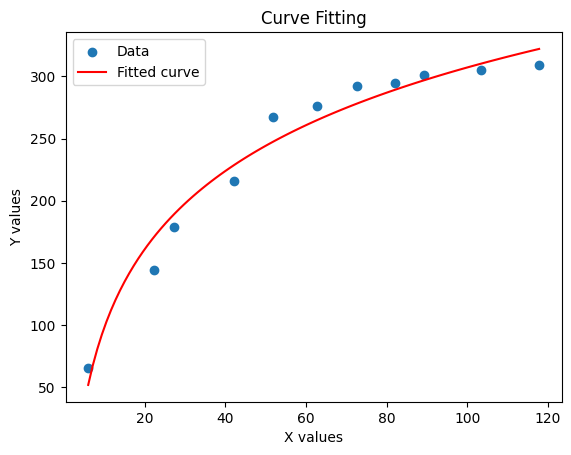

Fitted equation: y = 95.43 * log_2.85(x) + -112.02


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function for a*log_c(x) + b
def model_func(x, a, b, c):
    return a * np.log(x) / np.log(c) + b

# Load data from Excel file
file_path = 'fsr-fitting.xlsx'  # Replace with your Excel file path
data = pd.read_excel(file_path)

# Assuming data is in the first two columns
x_data = data.iloc[:, 0].to_numpy()
y_data = data.iloc[:, 1].to_numpy()

# Perform the curve fit
# Initial guesses for a, b, c
initial_guesses = [91.1, -112.02, 2.27]  # You might need to adjust these based on your data
popt, pcov = curve_fit(model_func, x_data, y_data, p0=initial_guesses)

# Extract the fitting parameters
a, b, c = popt

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = model_func(x_fit, a, b, c)
plt.plot(x_fit, y_fit, label='Fitted curve', color='red')
plt.legend()
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Curve Fitting')
plt.show()

print(f"Fitted equation: y = {a:.2f} * log_{c:.2f}(x) + {b:.2f}")
